# Practica final MACH

Sara María Caballero Santana, Paula Fernández Rivas, Carmen Garrido Suárez

# 1. Introducción

En este trabajo vamos a utilizar el data set NCDB_1999_to_2014, que contiene datos sobre accidentes de vehículos en Canadá desde el año 1999 hasta 2014. Presenta variables como mes del accidente, modelo del vehículo o edad de las personas, entre otras. 

El objetivo de la práctica es analizar las variables más importantes para sacar conclusiones, con el fin de responder a preguntas como:


*   ¿Qué conductores y vehículos son más propensos a tener accidentes?
*   ¿Qué contribuye a que haya fallecimientos? 
*   ¿Las condiciones meteorológicas influyen en los accidentes?
*   ¿En que estación del año se producen más accidentes?
*   ¿El sexo y la edad son factores influyentes?

Haremos dos problemas de clasificacion usando las variables que indican tanto la gravedad de la colisión, como la gravedad de los heridos.

# 2. Exploración y tratamiento de datos

Comenzamos importando las librerias y paquetes necesarios para realizar la práctica.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
import scipy,warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.linear_model import LogisticRegression
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NCDB_1999_to_2014.csv')
df.head().T

,0,1,2,3,4
C_YEAR,1999,1999,1999,1999,1999
C_MNTH,1,1,1,1,1
C_WDAY,1,1,1,1,1
C_HOUR,20,20,20,08,08
C_SEV,2,2,2,2,2
C_VEHS,02,02,02,01,01
C_CONF,34,34,34,01,01
C_RCFG,UU,UU,UU,UU,UU
C_WTHR,1,1,1,5,5
C_RSUR,5,5,5,3,3


In [ ]:
df.shape

(5860405, 22)

Esta base de datos contiene casi 6 millones de observaciones y 22 columnas (variables):

1. Variables referentes a la colisión:
  - **C_YEAR**: año del accidente.
  - **C_MNTH**: mes del accidente.
  - **C_WDAY**: día de la semana del accidente.
  - **C_HOUR**: hora del accidente.
  - **C_SEV**: gravedad de la colisión.
  - **C_VEHS**: número de vehículos involucrados en el accidente.
  - **C_CONF**: configuración de la colisión.
  - **C_RCFG**: configuración de la carretera.
  - **C_WTHR**: condición climatológica.
  - **C_RSUR**: estado de la superficie de la carretera.
  - **C_RALN**: alineación vial.
  - **C_TRAF**: control de tráfico.
2. Variables referentes al vehículo:
  - **V_ID**: número de secuencia del vehículo.
  - **V_TYPE**: tipo de vehículo.
  - **V_YEAR**: año del modelo de vehículo.
3. Variables referentes a los pasajeros.
  - **P_ID**: número de secuencia de la persona afectada .
  - **P_SEX**: género de la persona afectada.
  - **P_AGE**: edad de la persona afectada.
  - **P_PSN**: posición del pasajero en el vehículo o peaton.
  - **P_ISEV**: gravedad de la persona afectada.
  - **P_SAFE**: dispositivo de seguridad utilizado.
  - **P_USER**: tipo de usuario (conductor, pasajero, peaton...)


In [ ]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,C_YEAR,C_SEV
count,5.8604e+06,5.8604e+06
mean,2006,1.98317
std,4.56989,0.128636
min,1999,1
25%,2002,2
50%,2006,2
75%,2010,2
max,2014,2


Para no utilizar la totalidad de los datos, vamos a utilizar las observaciones de los últimos cuatro años, es decir, a partir del 2010, ya que representan un 25% de la base de datos total de acuerdo con el comando describe.

In [ ]:
df = df[df['C_YEAR']>2010]
df.head().T

,4598161,4598162,4598163,4598164,4598165
C_YEAR,2011,2011,2011,2011,2011
C_MNTH,01,01,01,01,01
C_WDAY,1,1,1,1,1
C_HOUR,10,12,00,17,17
C_SEV,2,2,2,2,2
C_VEHS,01,01,01,02,02
C_CONF,02,04,03,21,21
C_RCFG,03,UU,UU,UU,UU
C_WTHR,1,1,7,1,1
C_RSUR,3,5,3,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262244 entries, 4598161 to 5860404
Data columns (total 22 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   C_YEAR  1262244 non-null  int64 
 1   C_MNTH  1262244 non-null  object
 2   C_WDAY  1262244 non-null  object
 3   C_HOUR  1262244 non-null  object
 4   C_SEV   1262244 non-null  int64 
 5   C_VEHS  1262241 non-null  object
 6   C_CONF  1262244 non-null  object
 7   C_RCFG  1262244 non-null  object
 8   C_WTHR  1262244 non-null  object
 9   C_RSUR  1262244 non-null  object
 10  C_RALN  1262244 non-null  object
 11  C_TRAF  1262244 non-null  object
 12  V_ID    1262244 non-null  object
 13  V_TYPE  1262244 non-null  object
 14  V_YEAR  1262244 non-null  object
 15  P_ID    1262244 non-null  object
 16  P_SEX   1262244 non-null  object
 17  P_AGE   1262244 non-null  object
 18  P_PSN   1262244 non-null  object
 19  P_ISEV  1262244 non-null  object
 20  P_SAFE  1262244 non-null  object
 21  P_

Ahora tenemos un total de 1262244 observaciones.

Veamos cuántos datos duplicados hay.

In [ ]:
print('Número de valores duplicados:', df.shape[0] - df.drop_duplicates().shape[0])
df = df.drop_duplicates()

Número de valores duplicados: 1006


El motivo de los duplicados podría ser un error a la hora de introducir los datos o, a lo mejor, dos personas implicadas en el mismo accidente. Como no se sabe y no son muchas observaciones se van a eliminar. También se procede a eliminar variables que no ayudan en el análisis, como son las variables identificativas

In [ ]:
df = df.drop(['V_ID','P_ID'],axis=1)

En la leyenda de las variables vemos que toman valores como: 

*   'U','UU','UUUU' cuando el valor es desconocido
*   'X','XX','XXXX' cuando el valor no se proporciona
*   'Q','QQ' si no es ninguna de las categorias disponibles
*   'N','NN','NNNN' no aplicable

Que sean múltiples o no depende de si la variable toma valores con una o varias cifras.





Las N representan datos faltantes pero por otro motivo, por ejemplo el accidente es contra un coche aparcado o la observación es de un peatón y no un vehículo. Es un MNAR, pero al ser pocos casos lo vamos a eliminar por comodidad.

In [ ]:
df = df.replace({'N':np.nan,'NN' : np.nan, 'NNNN' : np.nan})


Las X las vamos a tratar como missings ya que no aportan nada de información.

Las Q son MNAR, y en este caso las vamos a convertir en una nueva categoría.En algunos casos, estás luego pasaran a formar parte de la categoría ‘Otros’.

In [ ]:
df = df.replace({'U' : np.nan, 'UU' : np.nan, 'UUUU' : np.nan})
df = df.replace({'X' : np.nan, 'XX' : np.nan, 'XXXX' : np.nan})
df = df.replace({'Q' : -1, 'QQ' : -1})

Ahora vamos a calcular el porcentaje de valores faltantes por filas y columnas.

In [ ]:
null_vars = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
null_obs = (df.isnull().sum(axis=1)/df.shape[1]*100).sort_values(ascending=False)

In [ ]:
#vemos porcentajes de missings por columnas
print(null_vars)

P_SAFE    20.046573
V_YEAR     9.979243
P_AGE      7.758885
P_ISEV     7.170891
C_RCFG     6.812751
C_RALN     6.252666
P_SEX      5.634860
V_TYPE     4.822088
P_USER     4.634653
C_TRAF     4.605316
C_CONF     2.877728
P_PSN      2.557804
C_WTHR     1.346931
C_RSUR     0.835370
C_HOUR     0.795647
C_WDAY     0.016571
C_MNTH     0.011179
C_VEHS     0.008484
C_SEV      0.000000
C_YEAR     0.000000
dtype: float64


In [ ]:
#porcentajes de missings por filas
print(null_obs.describe())

count    1.261238e+06
mean     4.308382e+00
std      7.517768e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+00
max      8.000000e+01
dtype: float64


In [ ]:
print(null_obs)

5245697    80.0
4923275    80.0
5562773    80.0
5860389    80.0
5860388    80.0
           ... 
5227929     0.0
5227930     0.0
5227931     0.0
5227933     0.0
5229063     0.0
Length: 1261238, dtype: float64


En el caso de las variables vemos que los porcentajes de missings son muy bajos, mientras que en las observaciones vemos que si hay determinadas observaciones que tienen más de un 50% de missings. Se podrían imputar por la moda, al ser variables categóricas, pero al haber tantas observaciones es mejor eliminarlas.

In [ ]:
df=df.dropna()

In [ ]:
#Comprobamos
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799314 entries, 4598190 to 5860380
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   C_YEAR  799314 non-null  int64 
 1   C_MNTH  799314 non-null  object
 2   C_WDAY  799314 non-null  object
 3   C_HOUR  799314 non-null  object
 4   C_SEV   799314 non-null  int64 
 5   C_VEHS  799314 non-null  object
 6   C_CONF  799314 non-null  object
 7   C_RCFG  799314 non-null  object
 8   C_WTHR  799314 non-null  object
 9   C_RSUR  799314 non-null  object
 10  C_RALN  799314 non-null  object
 11  C_TRAF  799314 non-null  object
 12  V_TYPE  799314 non-null  object
 13  V_YEAR  799314 non-null  object
 14  P_SEX   799314 non-null  object
 15  P_AGE   799314 non-null  object
 16  P_PSN   799314 non-null  object
 17  P_ISEV  799314 non-null  object
 18  P_SAFE  799314 non-null  object
 19  P_USER  799314 non-null  object
dtypes: int64(2), object(18)
memory usage: 128.1+ MB


Finalmente trabajaremos con una base de datos de 799314, una cifra más manejable a la original.

Ahora vamos a ver de que tipo es cada variable:

In [ ]:
df.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_TYPE    object
V_YEAR    object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
dtype: object

Observando la leyenda se ve que hay variables que toman valores de dos digitos, cuando deberían ser un único dígito (por ejemplo: 01, 02, en lugar de 1, 2). 

Para eliminar este problema se van a transformar a enteros, para que a la hora de observar las gráficas los valores se junten en las clases correspondientes.

También vamos a convertir la variable P_SEX en una variable binaria.

In [ ]:
df['P_SEX'] = df['P_SEX'].replace({'F' : 0, 'M' : 1})
df = df.astype('int64')

In [ ]:
#Comprobamos
df.dtypes

C_YEAR    int64
C_MNTH    int64
C_WDAY    int64
C_HOUR    int64
C_SEV     int64
C_VEHS    int64
C_CONF    int64
C_RCFG    int64
C_WTHR    int64
C_RSUR    int64
C_RALN    int64
C_TRAF    int64
V_TYPE    int64
V_YEAR    int64
P_SEX     int64
P_AGE     int64
P_PSN     int64
P_ISEV    int64
P_SAFE    int64
P_USER    int64
dtype: object

## 2. 1. Análisis variables

Las variables a clasificar son **C_SEV** y **P_ISEV**.

 **C_SEV** representa la gravedad de la colisión en función de si ha habido fallecidos (1) o no (2).

In [ ]:
df['C_SEV'].astype('category')
df['C_SEV'].value_counts()

2    787811
1     11503
Name: C_SEV, dtype: int64

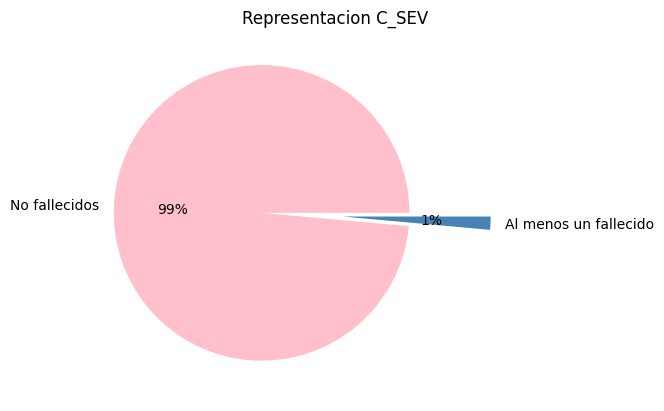

In [ ]:
y= (list(df['C_SEV'].value_counts()))
mylabels=['No fallecidos','Al menos un fallecido']
colors=['pink','steelblue']
explode = (0.5, 0.05)
plt.pie(y,labels=mylabels,autopct='%.0f%%',colors=colors,explode=explode)
plt.title('Representacion C_SEV')
plt.show()


Como se puede observar, en la mayoría de accidentes no hay víctimas mortales. Solo en un 1% de los casos hay fallecidos.

También podemos observar que tenemos un claro desbalanceo de datos. Más adelante, para que esto no nos resulte un problema a la hora de aplicar los algoritmos utilizaremos el método del undersampling, que consistirá en disminuir el número de observaciones de la clase mayoritaria (No fallecidos) y aumentar el número de observaciones de la clase minoritaria (Fallecidos) de manera aleatoria.

Vamos a continuar con la variable **P_ISEV**, que representa la gravedad de la persona implicada en el accidente en función de si ha sufrido daños (2) o no (1), o si ha fallecido (3)

In [ ]:
df['P_ISEV'].astype('category')
df['P_ISEV'].value_counts()

2    448080
1    346755
3      4479
Name: P_ISEV, dtype: int64

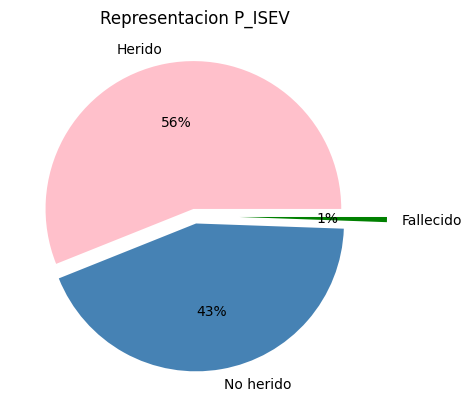

In [ ]:
y= (list(df['P_ISEV'].value_counts()))
mylabels=['Herido','No herido','Fallecido']
colors=['pink','steelblue','green']
explode = (0.05, 0.05,0.3)
plt.pie(y,labels=mylabels,autopct='%.0f%%',colors=colors,explode=explode)
plt.title('Representacion P_ISEV')
plt.show()

En la variable P_ISEV los resultados son similares, solo hay 1% de accidentes con victimas mortales. Del resto, más de la mitad son accidentes con heridos.

Los accidentes que resultan en fallecidos se estudian en la variable mencionada anteriormente, luego, para estudiar esta, incluiremos las observaciones con fallecidos en las observaciones de 'Heridos'.

### Relación de variables objetivo:

In [ ]:
rel = pd.crosstab(df['C_SEV'], df['P_ISEV'], normalize='all')
rel.index = ['Algún fallecido', 'Ningún fallecidos']
rel.columns = ['No herido', 'Herido', 'Fallecido']
rel

,No herido,Herido,Fallecido
Algún fallecido,0.003465,0.005322,0.005604
Ningún fallecidos,0.430350,0.555259,0.000000


Vemos que la relación entre las categorias de las variables tienen sentido. Viendo que en la gran parte de accidentes sin fallecidos hay heridos, y que cuando hay fallecidos no hay tantos heridos

### Histograma y otras gráficas

array([[<Axes: title={'center': 'C_YEAR'}>,
        <Axes: title={'center': 'C_MNTH'}>,
        <Axes: title={'center': 'C_WDAY'}>,
        <Axes: title={'center': 'C_HOUR'}>],
       [<Axes: title={'center': 'C_SEV'}>,
        <Axes: title={'center': 'C_VEHS'}>,
        <Axes: title={'center': 'C_CONF'}>,
        <Axes: title={'center': 'C_RCFG'}>],
       [<Axes: title={'center': 'C_WTHR'}>,
        <Axes: title={'center': 'C_RSUR'}>,
        <Axes: title={'center': 'C_RALN'}>,
        <Axes: title={'center': 'C_TRAF'}>],
       [<Axes: title={'center': 'V_TYPE'}>,
        <Axes: title={'center': 'V_YEAR'}>,
        <Axes: title={'center': 'P_SEX'}>,
        <Axes: title={'center': 'P_AGE'}>],
       [<Axes: title={'center': 'P_PSN'}>,
        <Axes: title={'center': 'P_ISEV'}>,
        <Axes: title={'center': 'P_SAFE'}>,
        <Axes: title={'center': 'P_USER'}>]], dtype=object)

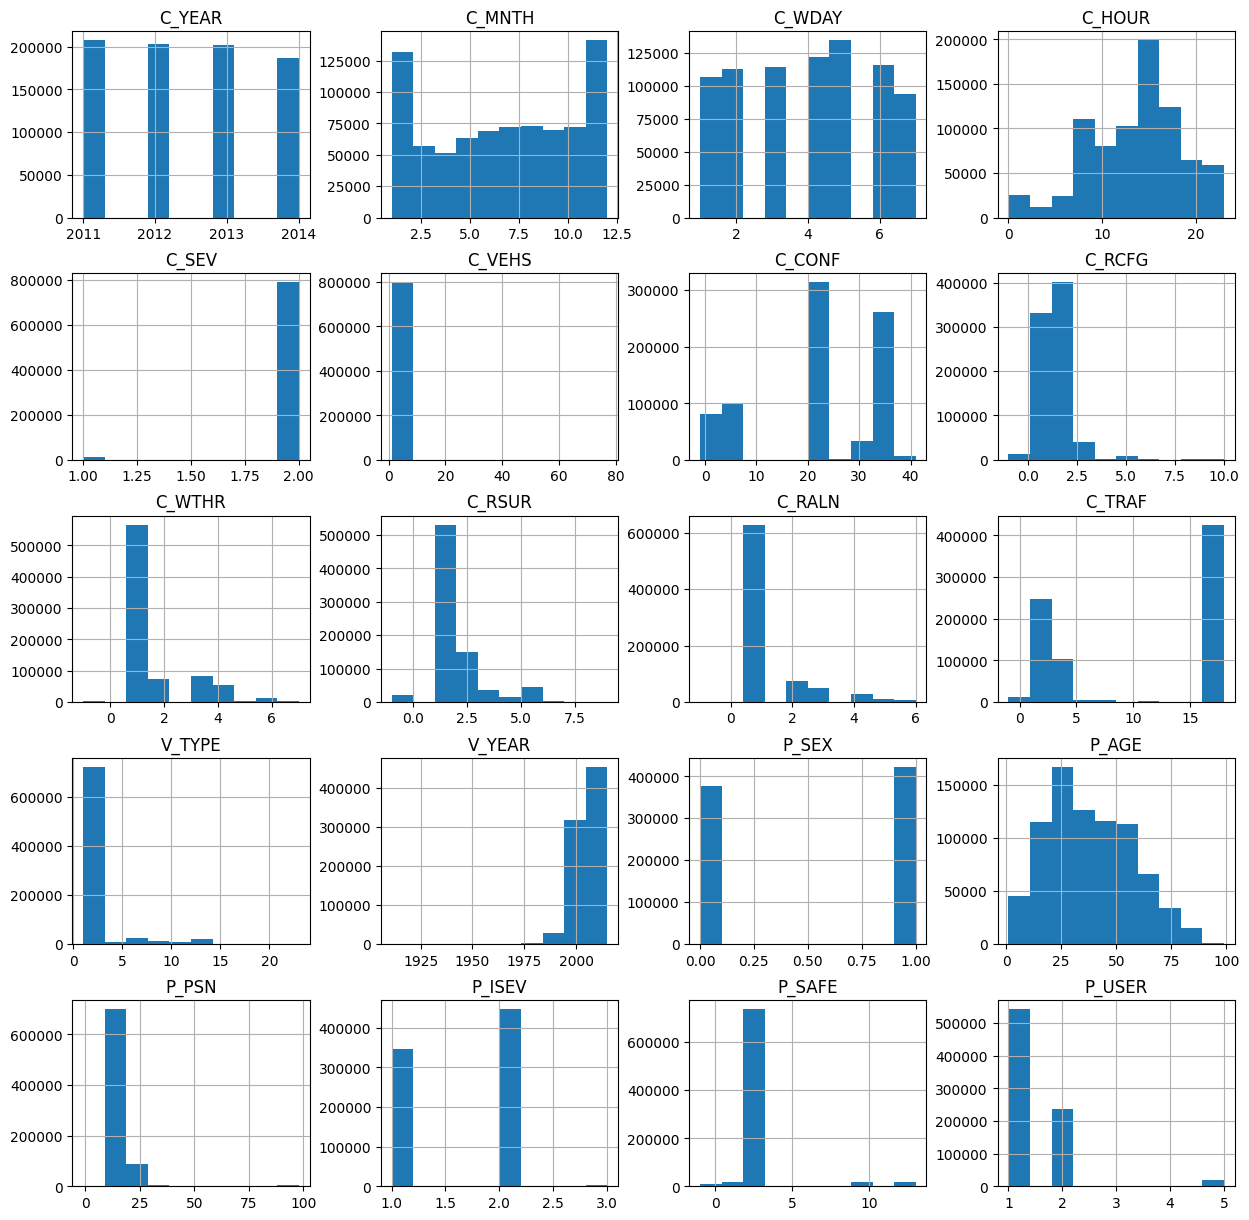

In [ ]:
#se realizan histogramas para todas las variables
df.hist(figsize=(15,15))

Se observa que el número de accidentes disminuye cada año.

Los meses con el mayor número de accidentes son diciembre y enero, coincidiendo con las vacaciones de Navidad. También hay un ligero aumento en verano. Los meses con menor cantidad de accidentes son febrero y marzo, coincidiendo esto con la Semana Blanca, época en la que no se viaja mucho.

La mayor cantidad de accidentes ocurren los jueves y viernes. 

Se tienen más accidentes entre las 15 y las 17, hora punta al coincidir que muchos colegios e institutos terminan las clases a las 15.

Las personas entre los 20 y 30 años son las que se ven involucradas en un mayor número de accidentes.

Realizamos las siguientes gráficas para observar más de cerca algunas variables:

Text(0.5, 1.0, 'C_VEHS')

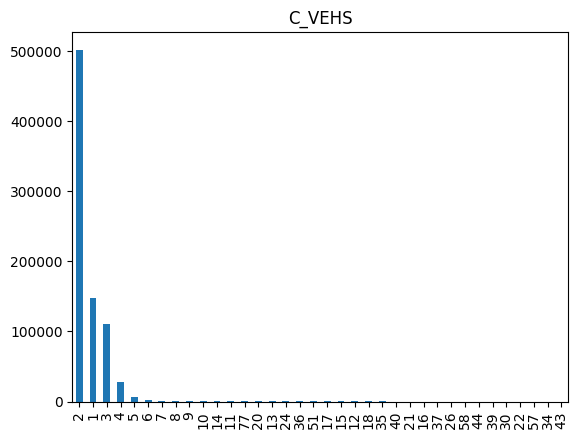

In [ ]:
df["C_VEHS"].value_counts().plot.bar()
plt.title('C_VEHS')

En general los accidentes son entre pocos vehículos: casi todos son entre dos, seguidos por accidentes que solo involucran 1 vehículo. Podemos observar que es muy extraño que ocurran accidentes que involucren más de cinco vehículos.

Text(0.5, 1.0, 'C_CONF')

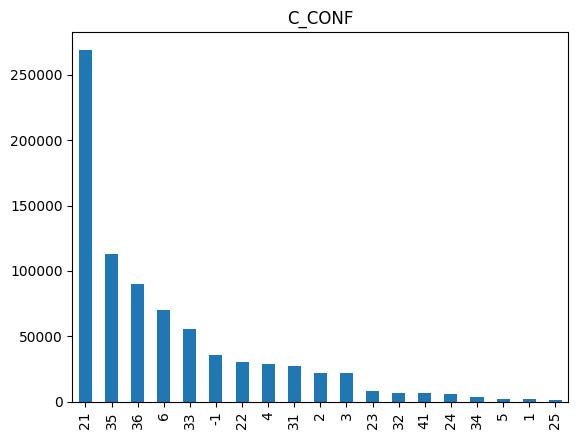

In [ ]:
df["C_CONF"].value_counts().plot.bar()
plt.title('C_CONF')

De los accidentes entre dos vehículos, casi la mitad son de choques en la parte trasera de uno de ellos mientras van en la misma dirección (21), seguidos por accidentes ocurridos en direcciones distintas o cambios de sentido.

Text(0.5, 1.0, 'C_RCFG')

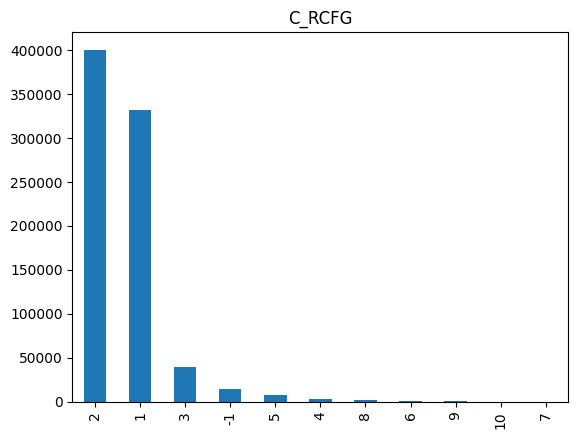

In [ ]:
df["C_RCFG"].value_counts().plot.bar()
plt.title('C_RCFG')

La mayoría de accidentes ocurren en una intersección de al menos dos vías públicas (2), seguido por carreteras sin intersecciones (1); por ejemplo, cruces a mitad de carretera.

Text(0.5, 1.0, 'C_WTHR')

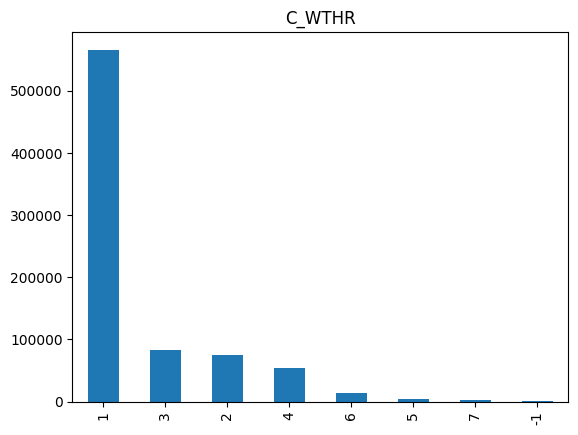

In [ ]:
df["C_WTHR"].value_counts().plot.bar()
plt.title('C_WTHR')

La gran mayoría de accidentes ocurren en un tiempo despejado y soleado, lo cual tiene sentido pues hay una mayor relajación en los conductores, sobre todo si se pasa por la misma ruta familiar.

Text(0.5, 1.0, 'C_RSUR')

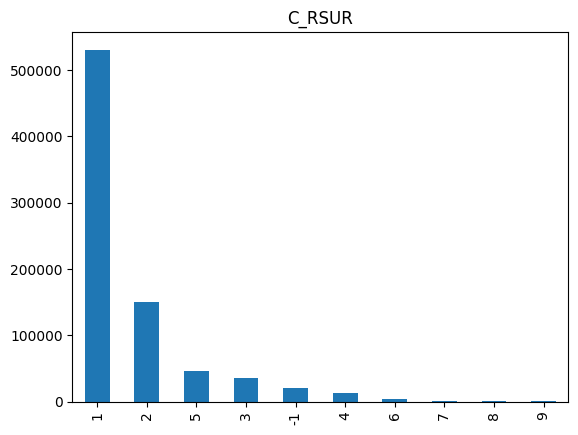

In [ ]:
df["C_RSUR"].value_counts().plot.bar()
plt.title('C_RSUR')

La mayoría de accidentes ocurren cuando la carretera se encuentra seca y normal (1).

Text(0.5, 1.0, 'C_RALN')

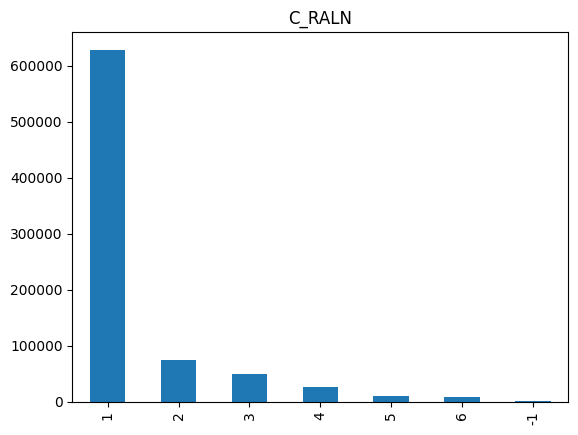

In [ ]:
df["C_RALN"].value_counts().plot.bar()
plt.title('C_RALN')

La gran mayoría de accidentes ocurren cuando se tiene una carretera recta y nivelada (1), luego, con estas observaciones y las anteriores podríamos suponer que esto hace que los conductores se confíen y aceleren en algunos tramos de carretera o simplemente se despisten debido a la seguridad del terreno.

Text(0.5, 1.0, 'C_TRAF')

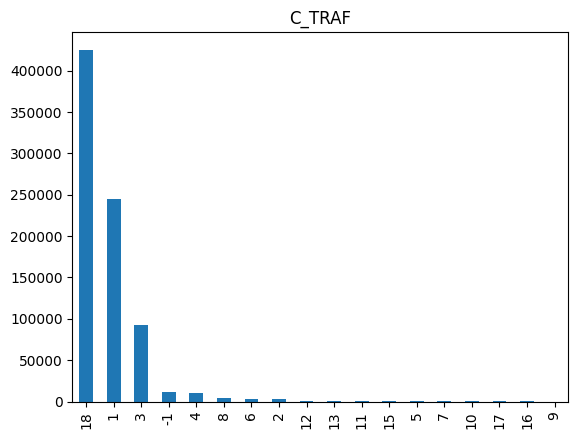

In [ ]:
df["C_TRAF"].value_counts().plot.bar()
plt.title('C_TRAF')

Ocurren bastantes accidentes en las zonas donde no se tiene ningún tipo de control presente (18), aunque también destacan en segunda posición las carreteras con señales de tráfico operativas (1).

Text(0.5, 1.0, 'V_TYPE')

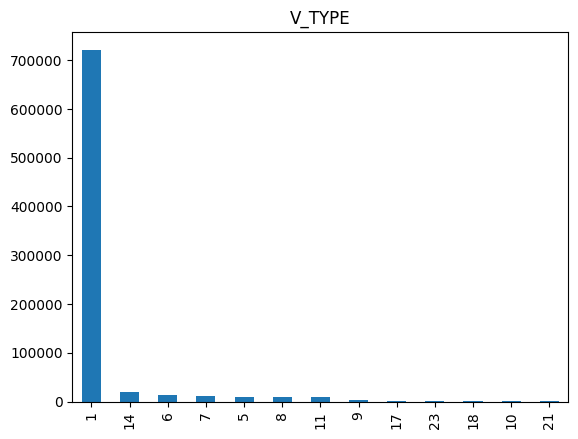

In [ ]:
df["V_TYPE"].value_counts().plot.bar()
plt.title('V_TYPE')

Casi todos los accidentes ocurren en vehículos ligeros, lo cual es bastante normal pues también es cierto que son los más comunes (1: incluye todo tipo de vehículo ligero: coches, furgonetas familiares, furgonetas comerciales pequeñas).

Text(0.5, 1.0, 'P_PSN')

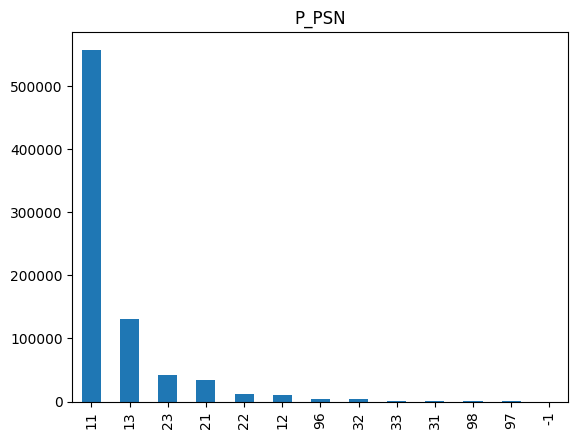

In [ ]:
df["P_PSN"].value_counts().plot.bar()
plt.title('P_PSN')

No es de extrañar que los conductores sean los que se ven más involucrados en accidentes (11), seguidos por los pasajeros que hacen de copiloto (13).

Text(0.5, 1.0, 'P_SAFE')

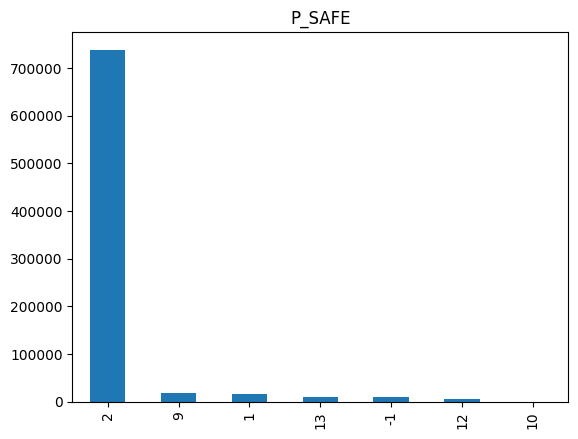

In [ ]:
df["P_SAFE"].value_counts().plot.bar()
plt.title('P_SAFE')

Casi todas las personas implicadas en un accidente utilizan medidas de seguridad tanto en adultos como en niños (2).

Text(0.5, 1.0, 'P_USER')

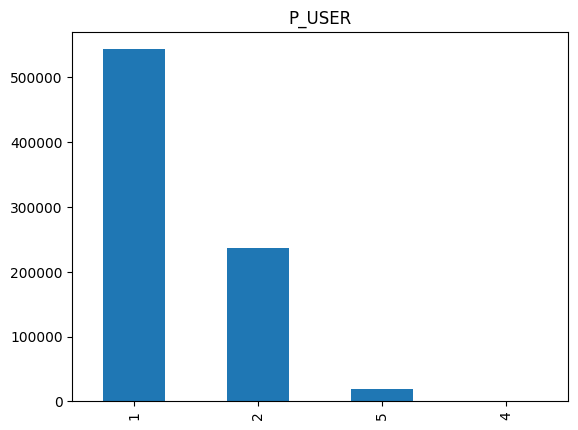

In [ ]:
df["P_USER"].value_counts().plot.bar()
plt.title('P_USER')

Es parecida a la P_PSN pues (1) corresponde a los conductores, mientras que aquí el número (2) junta a todo tipo de pasajeros del vehículo.

### Outliers

In [ ]:
descriptivo=df.describe().T
descriptivo

,count,mean,std,min,25%,50%,75%,max
C_YEAR,799314.0,2012.459690,1.111317,2011.0,2011.0,2012.0,2013.0,2014.0
C_MNTH,799314.0,6.695267,3.464789,1.0,4.0,7.0,10.0,12.0
C_WDAY,799314.0,3.987711,1.926273,1.0,2.0,4.0,6.0,7.0
C_HOUR,799314.0,13.645596,4.973177,0.0,10.0,14.0,17.0,23.0
C_SEV,799314.0,1.985609,0.119097,1.0,2.0,2.0,2.0,2.0
C_VEHS,799314.0,2.111878,1.527301,1.0,2.0,2.0,2.0,77.0
C_CONF,799314.0,22.225163,11.920149,-1.0,21.0,21.0,35.0,41.0
C_RCFG,799314.0,1.646163,0.872912,-1.0,1.0,2.0,2.0,10.0
C_WTHR,799314.0,1.624033,1.164042,-1.0,1.0,1.0,2.0,7.0
C_RSUR,799314.0,1.532081,1.181544,-1.0,1.0,1.0,2.0,9.0


Consideramos outliers aquellas observaciones que están fuera del rango intercuartílico, que es una medida que consiste en restar el primer cuartil al tercero.

In [ ]:
IQR= descriptivo['75%']-descriptivo['25%']
descriptivo['outliers'] = (descriptivo['min']<(descriptivo['25%']-(3*IQR)))|(descriptivo['max'] > 
                                                                             (descriptivo['75%']+3*IQR))
descriptivo.loc[descriptivo.outliers,]

,count,mean,std,min,25%,50%,75%,max,outliers
C_SEV,799314.0,1.985609,0.119097,1.0,2.0,2.0,2.0,2.0,True
C_VEHS,799314.0,2.111878,1.527301,1.0,2.0,2.0,2.0,77.0,True
C_RCFG,799314.0,1.646163,0.872912,-1.0,1.0,2.0,2.0,10.0,True
C_WTHR,799314.0,1.624033,1.164042,-1.0,1.0,1.0,2.0,7.0,True
C_RSUR,799314.0,1.532081,1.181544,-1.0,1.0,1.0,2.0,9.0,True
C_RALN,799314.0,1.416436,0.959520,-1.0,1.0,1.0,1.0,6.0,True
V_TYPE,799314.0,1.795069,2.673883,1.0,1.0,1.0,1.0,23.0,True
V_YEAR,799314.0,2004.860236,5.449528,1911.0,2002.0,2005.0,2009.0,2015.0,True
P_PSN,799314.0,13.190048,7.256505,-1.0,11.0,11.0,13.0,98.0,True
P_SAFE,799314.0,2.309555,1.841649,-1.0,2.0,2.0,2.0,13.0,True


Esta tabla muestra las variables donde se considera que tenemos outliers, aunque es de esperar, por ejemplo, que 'el número de vehículos involucradros en un accidente' solo sea de 2, luego cuando no se da ese caso saldrá como un valor extremo. Lo mismo ocurre con el resto de variables, luego no es necesario hacer un tratamiento de outliers.

## 2. 2. Transformación de variables

Debido a lo que hemos observado en las gráficas anteriores, vamos a realizar transformaciones en las variables que consideramos necesarias.

Para el número de vehículos implicados:

In [ ]:
#agrupamos a partir de cinco
df["C_VEHS"]=np.where(df["C_VEHS"]>=5, '>5', df["C_VEHS"])

In [ ]:
df["C_VEHS"] = le.fit_transform(df["C_VEHS"])

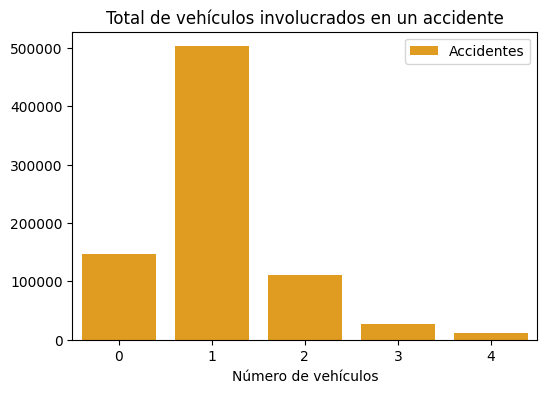

In [ ]:
df1 = df.groupby('C_VEHS').size()
ax = plt.subplots(figsize = (6,4))
ax = sns.barplot(x=df1.index, y=df1.values, color='orange', label='Accidentes')
ax.set(xlabel="Número de vehículos", title='Total de vehículos involucrados en un accidente')
ax.legend()

plt.show()

**Las etiquetas son:**
- 0: Un único vehículo implicado.
- 1: Dos vehículos implicados.
- 2: Tres vehículos implicados.
- 3: Cuatro vehículos implicados.
- 4: Cinco o más vehículos implicados.

La configuración de la carretera:

In [ ]:
#agruapamos las categorias
df["C_RCFG"]=np.where((df["C_RCFG"]>=4) | (df["C_RCFG"]==-1), 'Otro', df["C_RCFG"])

In [ ]:
df["C_RCFG"] = le.fit_transform(df["C_RCFG"])

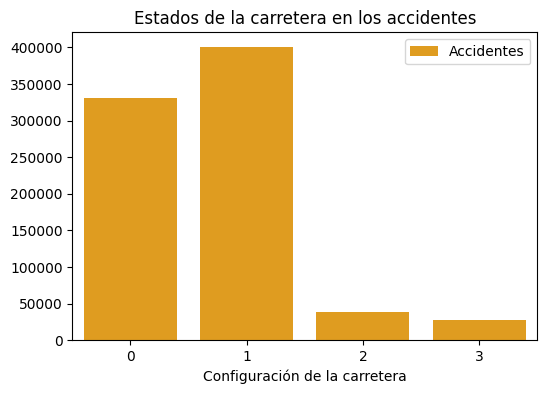

In [ ]:
df1 = df.groupby('C_RCFG').size()
ax = plt.subplots(figsize = (6,4))
ax = sns.barplot(x=df1.index, y=df1.values, color='orange', label='Accidentes')
ax.set(xlabel="Configuración de la carretera", title='Estados de la carretera en los accidentes')
ax.legend()

plt.show()

**Las etiquetas son:**
- 0: No hay intersección.
- 1: Intersección de al menos dos vías públicas.
- 2: Intersección a la entrada de un parking, garaje o callejón.
- 3: Otro tipo de vía.

Control de tráfico:

In [ ]:
df["C_TRAF"]=np.where((df["C_TRAF"]==2)|(df["C_TRAF"]==-1)|((df["C_TRAF"]>=4)&(df["C_TRAF"]<18)), 'Otro', df["C_TRAF"])

In [ ]:
df["C_TRAF"] = le.fit_transform(df["C_TRAF"])

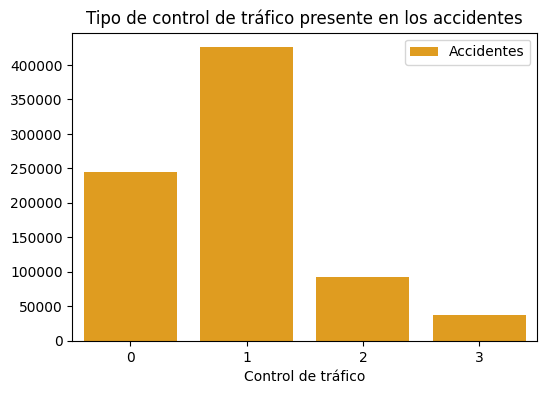

In [ ]:
df1 = df.groupby('C_TRAF').size()
ax = plt.subplots(figsize = (6,4))
ax = sns.barplot(x=df1.index, y=df1.values, color='orange', label='Accidentes')
ax.set(xlabel="Control de tráfico", title='Tipo de control de tráfico presente en los accidentes')
ax.legend()

plt.show()

**Las etiquetas son:**
- 0: Señales de tráfico operativas.
- 1: No existe control de tráfico.
- 2: En una señal de stop.
- 3: Otro tipo de control de tráfico.

Tipos de vehículo:

In [ ]:
df["V_TYPE"]=np.where((df["V_TYPE"]>2)|(df["V_TYPE"]==-1), 'Otro', df["V_TYPE"])

In [ ]:
df["V_TYPE"] = le.fit_transform(df["V_TYPE"])

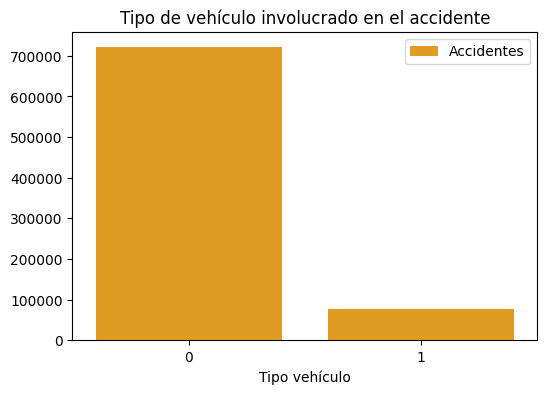

In [ ]:
df1 = df.groupby('V_TYPE').size()
ax = plt.subplots(figsize = (6,4))
ax = sns.barplot(x=df1.index, y=df1.values, color='orange', label='Accidentes')
ax.set(xlabel="Tipo vehículo", title='Tipo de vehículo involucrado en el accidente')
ax.legend()

plt.show()

**Las etiquetas son:**
- 0: Vehículo ligero (coches, furgonetas familiares, furgonetas comerciales pequeñas)
- 1: Otro tipo de vehículo.

Posición del pasajero en el vehículo o peatón:

In [ ]:
#agrupamos la variable
df["P_PSN"]=np.where(df["P_PSN"]==11, 'Conductor', df["P_PSN"])
df["P_PSN"]=np.where((df["P_PSN"]!='Conductor'), 'Pasajeros', df["P_PSN"])

In [ ]:
df["P_PSN"] = le.fit_transform(df["P_PSN"])

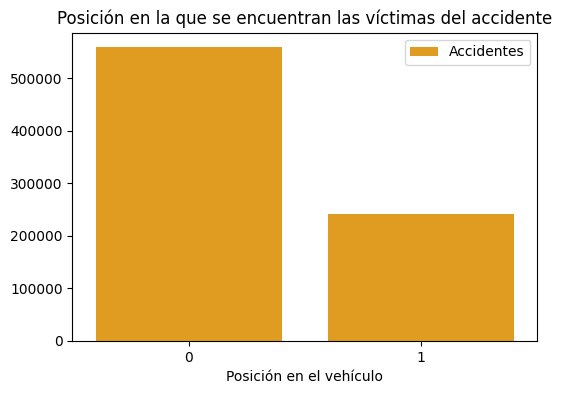

In [ ]:
df1 = df.groupby('P_PSN').size()
ax = plt.subplots(figsize = (6,4))
ax = sns.barplot(x=df1.index, y=df1.values, color='orange', label='Accidentes')
ax.set(xlabel="Posición en el vehículo", title='Posición en la que se encuentran las víctimas del accidente')
ax.legend()

plt.show()

**Las etiquetas son:**
- 0: Conductor
- 1: Pasajero

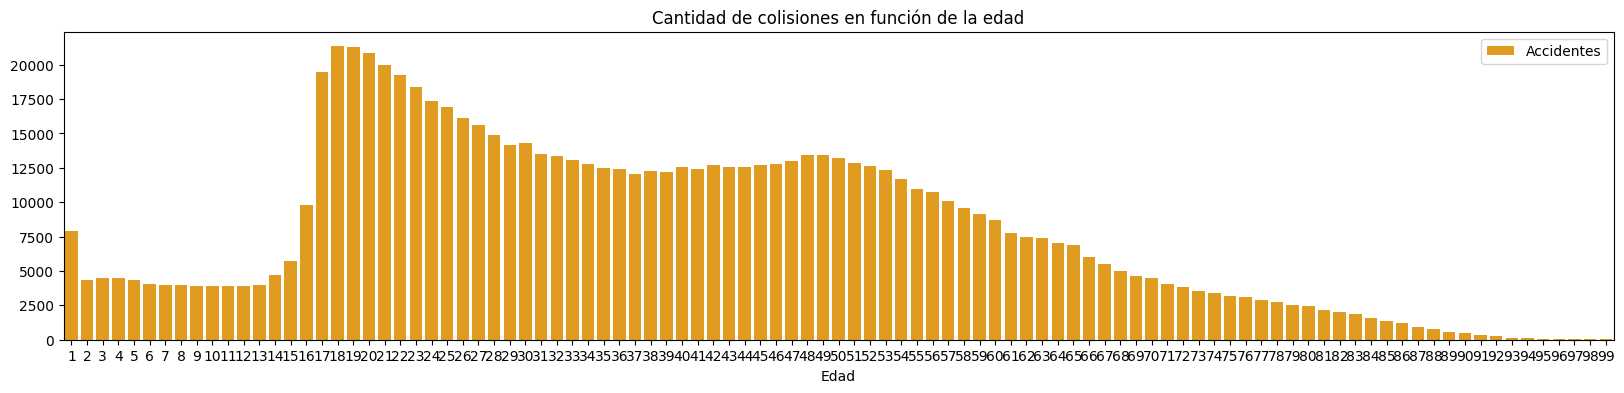

In [ ]:
df1 = df.groupby('P_AGE').size()
ax = plt.subplots(figsize = (20,4))
ax = sns.barplot(x=df1.index, y=df1.values, color='orange', label='Accidentes')
ax.set(xlabel="Edad", title='Cantidad de colisiones en función de la edad')
ax.legend()

plt.show()

Como podemos observar se produce un aumento significativo a partir de los 17 años, esto puede deberse a que la edad mínima para obtener el permiso de conducir en Canadá es de 16 años.
También observamos que el número de accidentes alcanza su máximo a los 18/19 años y comienza a descender hasta los 37, a partir de los cuales asciende de forma poco significativa hasta los 49 y vuelve a descender.


In [ ]:
df.loc[df['P_AGE'] < 17, 'P_AGE'] = 0        #Menores (0-16)
df.loc[df['P_AGE'] >= 70, 'P_AGE'] = 4       #Tercera edad (70+)
df.loc[df['P_AGE'] >= 50, 'P_AGE'] = 3       #Mayores (50-70)
df.loc[df['P_AGE'] >= 30, 'P_AGE'] = 2       #Adultos (30-50)
df.loc[df['P_AGE'] >= 17, 'P_AGE'] = 1       #Jóvenes (17-30)
df['P_AGE'] = df['P_AGE'].astype('category')
df['P_AGE'].value_counts()

2    256426
1    235651
3    179683
0     77403
4     50151
Name: P_AGE, dtype: int64

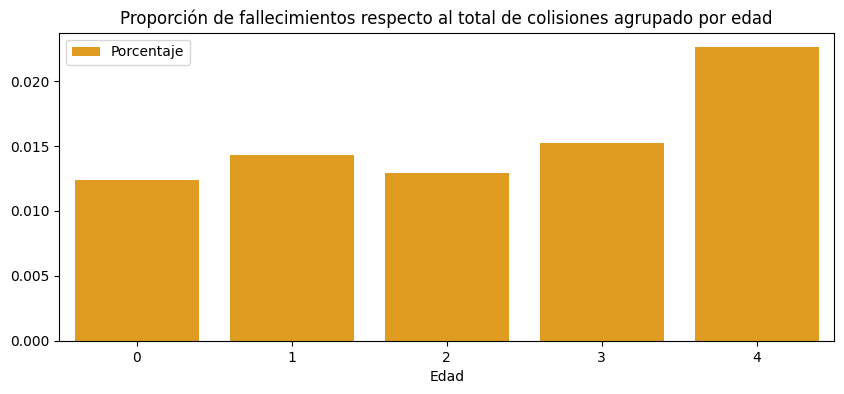

In [ ]:
df1 = df[df['C_SEV']==1].groupby('P_AGE').size() / df.groupby('P_AGE').size()

ax = plt.subplots(figsize = (10,4))
ax = sns.barplot(x=df1.index, y=df1.values, color='orange', label='Porcentaje')
ax.set(xlabel="Edad", title='Proporción de fallecimientos respecto al total de colisiones agrupado por edad')
ax.legend()

plt.show()

**Las etiquetas son:**
- 0: Menor de 16 años.
- 1: Jóvenes (17-30 años).
- 2: Adultos (30-50 años).
- 3: Mayores (50-70 años)
- 4: Tercera edad (+70 años).

In [ ]:
df5=df.copy() #se crea una copia que se usará más adelante

## 2. 3. Creación de variable: Edad del vehículo en el momento del accidente.

Vamos a crear esta variable para observar la antigüedad suelen tener los modelos de los vehículos en el momento del accidente.

In [ ]:
df["edad_veh"]=df['C_YEAR']-df['V_YEAR']

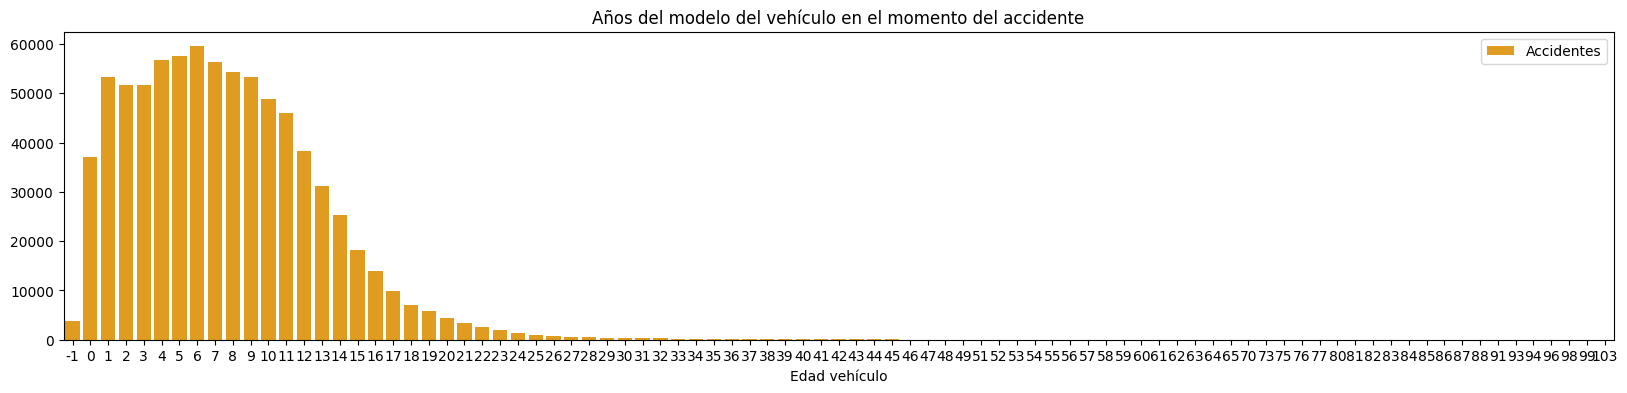

In [ ]:
df1 = df.groupby('edad_veh').size()
ax = plt.subplots(figsize = (20,4))
ax = sns.barplot(x=df1.index, y=df1.values, color='orange', label='Accidentes')
ax.set(xlabel="Edad vehículo", title='Años del modelo del vehículo en el momento del accidente')
ax.legend()

plt.show()

Como vemos hay algunos valores de la variable 'edad' que son -1. Esto se debe a un error a la hora de introducir los datos, ya que es imposible que el año del vehículo sea posterior al de la colisión. Por eso los vamos a imputar por la media.

In [ ]:
df["edad_veh"].describe()

count    799314.000000
mean          7.599454
std           5.350204
min          -1.000000
25%           4.000000
50%           7.000000
75%          11.000000
max         103.000000
Name: edad_veh, dtype: float64

Vamos a reemplazar estos valores por 8.

In [ ]:
df["edad_veh"]=df["edad_veh"].replace(-1, 8)

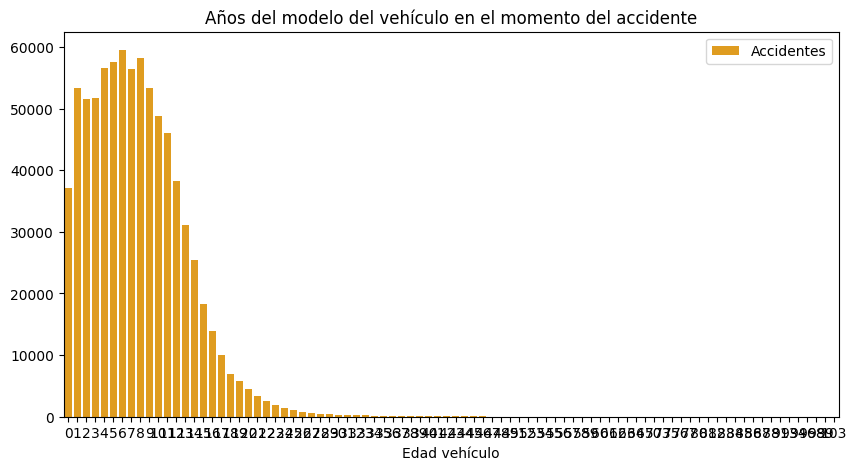

In [ ]:
df1 = df.groupby('edad_veh').size()
ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=df1.index, y=df1.values, color='orange', label='Accidentes')
ax.set(xlabel="Edad vehículo", title='Años del modelo del vehículo en el momento del accidente')
ax.legend()

plt.show()

Observamos que el mayor número de accidentes ocurren cuando un modelo de vehículo tiene 6 años.
Para el primer año del modelo del vehículo, se le podría dar una oferta en la prima, en los siguientes 4 años subirla de manera progresiva y a partir de los 11-12 años del modelo de vehículo, llevar a cabo acciones correctivas.

Como tenemos la antigüedad del modelo en el momento del accidente, vamos a eliminar las variables que hemos usado para calcularla.

In [ ]:
df=df.drop(['V_YEAR', 'C_YEAR'], axis=1)

A su vez, vamos a agrupar la antigüedad de los modelos del vehículo:

In [ ]:
df["edad_veh"]=np.where(df["edad_veh"]<5, 0, df["edad_veh"]) #el vehículo tiene menos de 5 años
df["edad_veh"]=np.where(df["edad_veh"]>=15, 3, df["edad_veh"]) #el vehículo tiene más de 15 años
df["edad_veh"]=np.where(df["edad_veh"]>=10, 2, df["edad_veh"]) #el vehículo tiene entre 10 y 15 años
df["edad_veh"]=np.where(df["edad_veh"]>=5, 1, df["edad_veh"]) #el vehiculo tiene entre 5 y 10 años

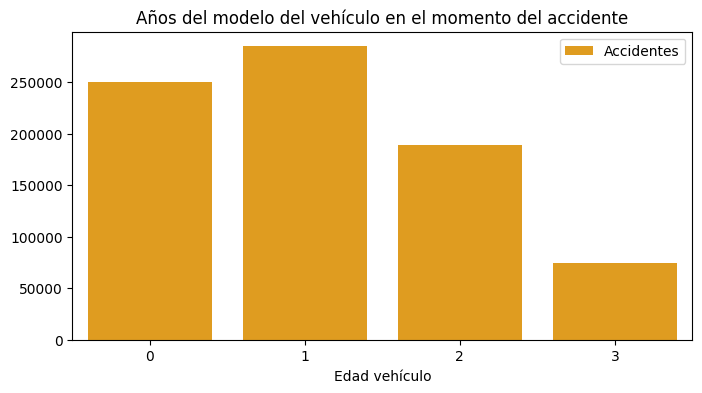

In [ ]:
df1 = df.groupby('edad_veh').size()
ax = plt.subplots(figsize = (8,4))
ax = sns.barplot(x=df1.index, y=df1.values, color='orange', label='Accidentes')
ax.set(xlabel="Edad vehículo", title='Años del modelo del vehículo en el momento del accidente')
ax.legend()

plt.show()

**Las etiquetas son:**
- 0: El modelo tiene menos de 5 años.
- 1: El modelo tiene entre 5 y 9 años.
- 2: El modelo tiene entre 10 y 14 años.
- 3: El modelo tiene 15 años o más.

## 2. 4. Correlaciones

Calculamos las correlaciones entre las variables de nuestro modelo para ver si es necesario algún cambio más en nuestro data frame.

<Axes: >

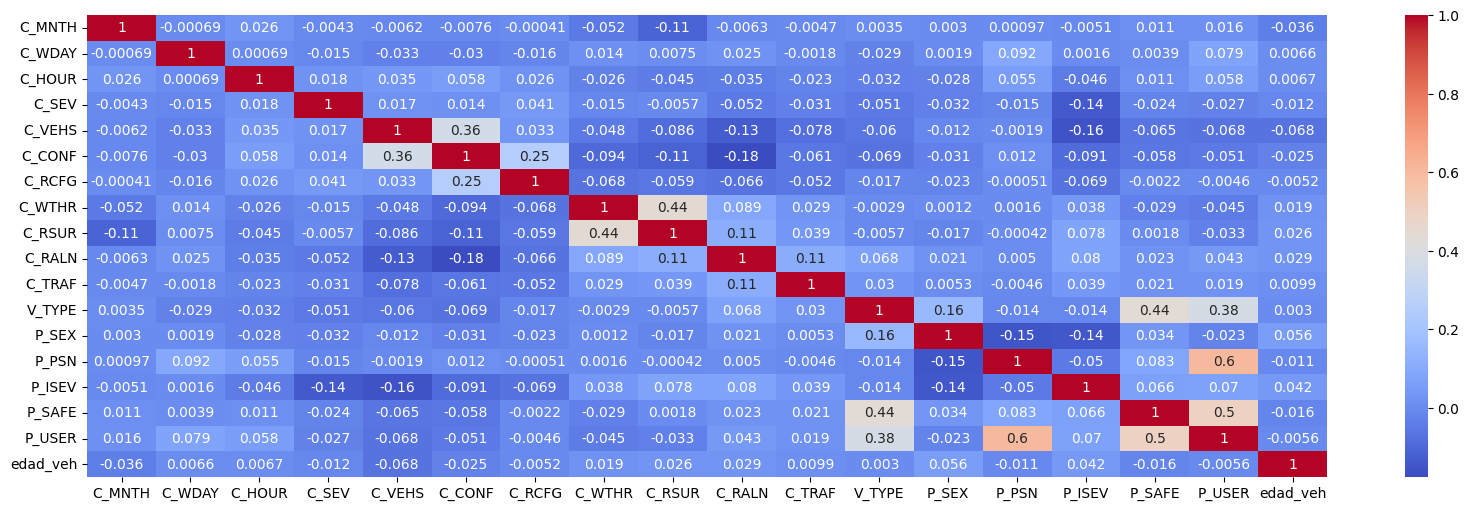

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Observamos que la mayoria tienen una correlación baja salvo P_USER y P_PSN con una correlación de 0.61 que está por encima de 0.5 pero no es muy elevada, luego no tendremos problemas para aplicar los algoritmos.

## 2. 5. Balanceo de variable objetivo

<Axes: >

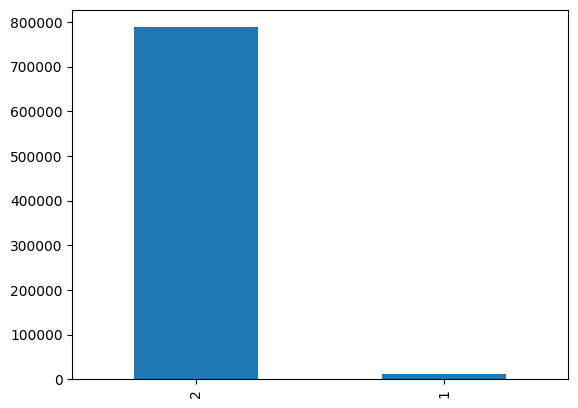

In [ ]:
df["C_SEV"].value_counts().plot.bar()

**Las etiquetas son:**
- 2: No fallecidos.
- 1: Al menos un fallecido.

In [ ]:
rus.fit_resample(df.drop('C_SEV', axis = 1), df[['C_SEV']])
print('Filas que nos quedamos:', len(rus.sample_indices_))

Filas que nos quedamos: 23006


<Axes: >

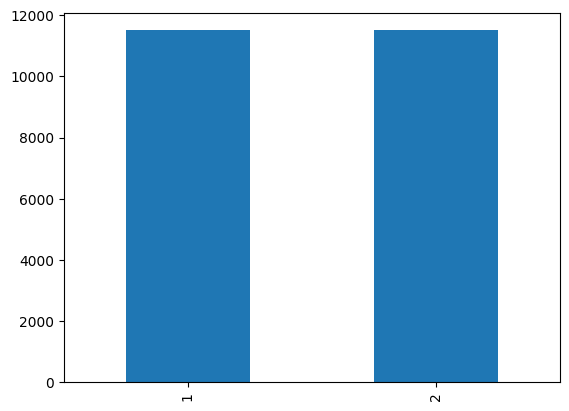

In [ ]:
df_balanced = df.iloc[rus.sample_indices_]
df_balanced['C_SEV'].value_counts().plot.bar()

# 3. Aplicación de algoritmos

## 3.1. Variable C_SEV

### Filtrado de variables para C_SEV

Vamos a realizar un filtrado mediante regresión para disminuir la cantidad de variables a usar por los algoritmos, lo que resultará en una ejecución más eficiente.

In [ ]:
#scatter plot por colores
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

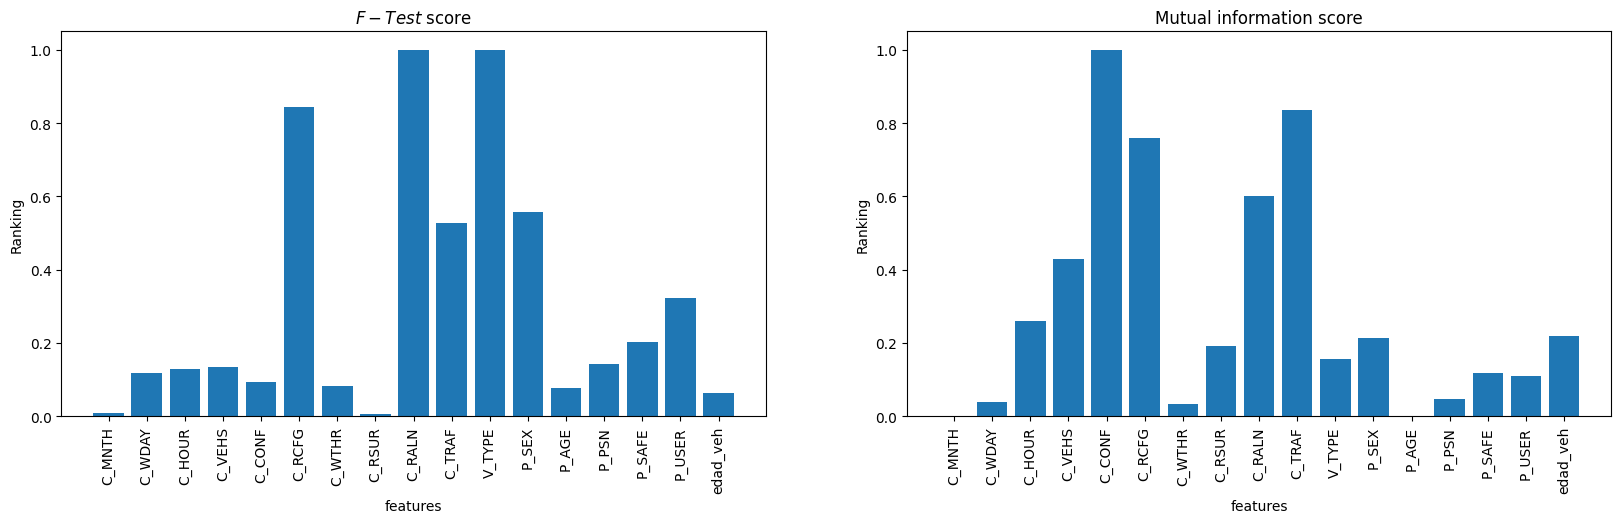

In [ ]:
#se busca las variables con más relacion con c_sev
X=df_balanced.drop(["C_SEV", "P_ISEV"], axis=1)
y=df_balanced["C_SEV"]

feature_names = X.columns[:]

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Observando ambas gráficas, decidimos quitar las siguientes variables de nuestro modelo:

In [ ]:
df_balanced=df_balanced.drop(["C_MNTH","C_WDAY","C_VEHS","C_WTHR","C_RSUR","P_AGE","P_PSN","edad_veh"], axis=1)

Luego, las variables que más influencia tienen en la gravedad de una colisión son: la configuración de la carretera, el control de tráfico y la alineación vial.

Dividimos nuestra base de datos en un 80% para el entrenamiento y un 20% de datos test.

Las variables que se utilizan son: 

- C_HOUR: hora del accidente.
- C_CONF: configuración de la colisión. 
- C_RCFG: configuración de la carretera.  
- C_RALN: alineación vial. 
- C_TRAF: control de tráfico. 

- V_TYPE: tipo de vehículo.

- P_SEX: género de la persona afectada.
- P_SAFE: dispositivo de seguridad utilizado.
- P_USER: tipo de usuario



In [ ]:
X = df_balanced.drop(['C_SEV','P_ISEV'], axis=1)
y = df_balanced["C_SEV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18404, 9), (4602, 9), (18404,), (4602,))

Para codificar nuestras variables vamos a aplicar One Hot Encoding: creará una columna binaria (que solo puede contener los valores 0 o 1) para cada valor único que exista en la variable categórica que estamos codificando, y marcará con un 1 la columna correspondiente al valor presente en cada registro, dejando las demás columnas con un valor de 0. 

Es aconsejable utilizarlo en nuestro caso pues nuestras categorías de "Fallecido", "No fallecido" no son de tipo ordinal y tampoco presentan una gran cantidad de clases.

In [ ]:
#aplicamos one hot encoding para hacer más eficiente la aplicación de los modelos
enc = ce.OneHotEncoder(cols=X_train.columns)
model=enc.fit(X_train, y_train)
X_train=model.fit_transform(X_train, y_train)
X_test=model.transform(X_test, y_test)

### 3.1.1 Árbol de decisión

**¿Cómo funciona?**

- Un árbol de decisión en Machine Learning es una estructura de árbol similar a un diagrama de flujo donde un nodo interno representa una característica (o atributo), la rama representa una regla de decisión y cada nodo hoja representa el resultado.
- El nodo superior en un árbol de decisión en Machine Learning se conoce como el nodo raíz. Aprende a particionar en función del valor del atributo. Divide el árbol de una manera recursiva llamada partición recursiva.
- Esta estructura tipo diagrama de flujo ayuda a tomar decisiones. Es una visualización como un diagrama de flujo que imita fácilmente el pensamiento a nivel humano. Es por eso que los árboles de decisión son fáciles de entender e interpretar.
- El procedimiento genérico es:
  + Selecciona el mejor atributo utilizando Medidas de selección de atributos (ASM) para dividir las observaciones.
  + Considera ese atributo como un nodo de decisión y divide el conjunto de datos en subconjuntos más pequeños recursivamente para cada nodo hijo hasta que una de las condiciones coincida con lo siguiente:
  
  1. Todas las tuplas pertenecen al mismo valor de atributo.
  
  2. No quedan más atributos.
  
  3. No hay más instancias.

best mean cross-validation score: 0.741
best parameters: {'max_depth': 11}


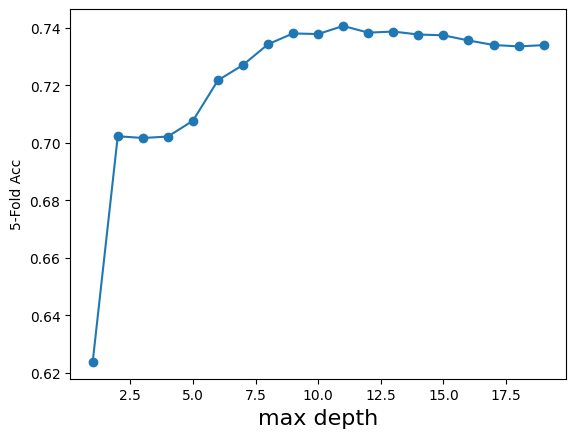

In [ ]:
#buscamos la profundidad óptima para el arbol
maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

Vamos a elegir una máxima profundidad de 11 pues no observamos grandes mejoras después de ese punto.

In [ ]:
arbol = DecisionTreeClassifier(random_state=0,max_depth=11)
# Entrenar el modelo
arbol.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = arbol.predict(X_test)

# Evaluar el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy árbol: ', acc)

Accuracy árbol:  0.7368535419382877


Obtenemos un Accuracy (exactitud) del 73'68%, es decir, el modelo acierta 3 de cada 4 casos aproximadamente.

#### Matriz de confusión para el Árbol de Decisión

<Axes: >

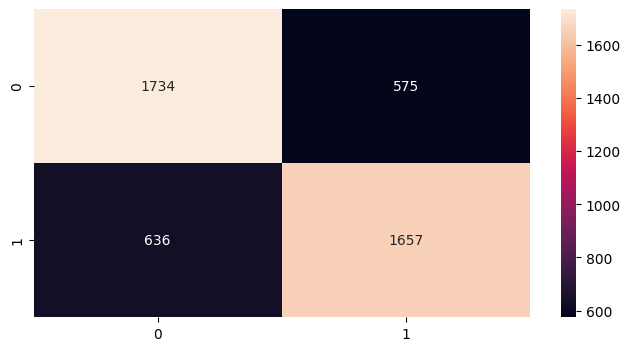

In [ ]:
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(C, annot=True, fmt='g')

La matriz de confusión nos muestra que clases se han clasificado correctamente y cuales no, comparando los resultados del test con los de la predicción. En nuestro caso, observamos como para la clase 0, se han predicho correctamente 1734 observaciones, mientras que 575 son incorrectas, pues correspondían en realidad a la clase 1.

De manera análoga el análisis para la clase 1.

Observamos que en torno al 25% de los datos se clasifican erroneamente, lo que concuerda con la exactitud obtenida.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.75      0.74      2309
           2       0.74      0.72      0.73      2293

    accuracy                           0.74      4602
   macro avg       0.74      0.74      0.74      4602
weighted avg       0.74      0.74      0.74      4602



Esta tabla nos muestra las siguientes medidas:

- *Precision (Precisión)*
Se conoce también como valor predictivo positivo y es la proporción de instancias relevantes entre las instancias recuperadas. En otras palabras, responde a la pregunta "¿Qué proporción de identificaciones positivas fue realmente correcta?"

- *Recall (Sensibilidad)*
Conocida también como tasa de aciertos o tasa positiva real (TPR), es la proporción de la cantidad total de instancias pertinentes que se recuperaron realmente. Responde a la pregunta "¿Qué proporción de positivos reales se identificó correctamente?"

- *F1 score (Puntuación F1)*
Es una medida de la precisión de una prueba, es la media armónica de precisión y recuperación. Puede tener una puntuación máxima de 1 (precisión y recuerdo perfectos) y una mínima de 0. En general, es una medida de la precisión y robustez de su modelo.

Con estos resultados vemos que de todos los accidentes mortales que el modelo predijo, acertó en un 73%. En el caso de los accidentes mortales que sí se produjeron el modelo clasifico correctamente 74%.

### 3.1.2 Random Forest

Se trata de un método de ensamblado que combina de varios árboles de decisión y es probable que arroje mejores resultados que el Árbol.

best mean cross-validation score: 0.759
best parameters: {'max_depth': 18}


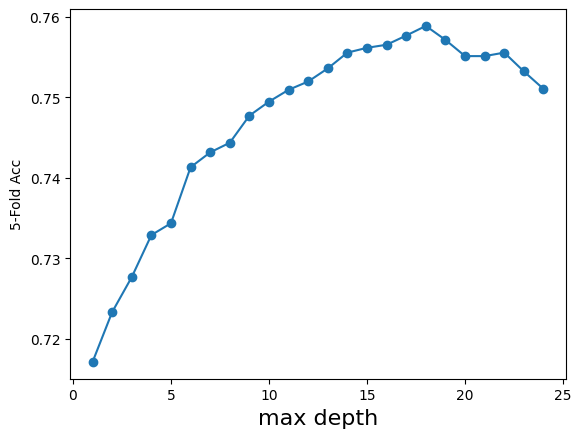

In [ ]:
#buscamos la profundidad de los árboles optima para el modelo
maxDepth = range(1,25)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(n_estimators = 100), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train.ravel())
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [ ]:
# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=20)

# Entrenar el modelo
rf.fit(X_train, y_train.ravel())

# Hacer predicciones en los datos de prueba
y_pred = rf.predict(X_test)

# Evaluar el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Random Forest: ', acc)

Accuracy Random Forest:  0.7611907866145154


Como podemos observar hemos obtenido una precisión de 76'11%, superior como se esperaba al Árbol de Decisión.

#### Matriz de confusión para Random Forest

<Axes: >

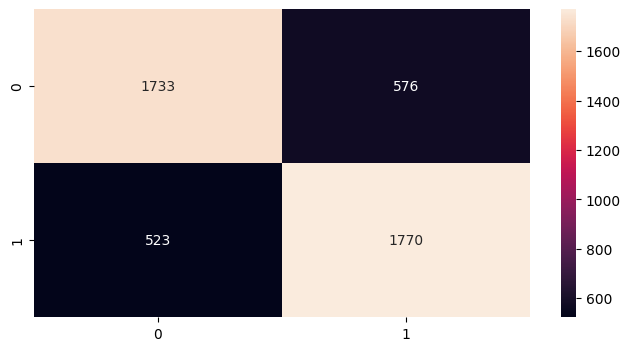

In [ ]:
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(C, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.75      0.76      2309
           2       0.75      0.77      0.76      2293

    accuracy                           0.76      4602
   macro avg       0.76      0.76      0.76      4602
weighted avg       0.76      0.76      0.76      4602



A la vista de los datos, el modelo predice correctamente los accidentes mortales en un 77% de los casos.

### 3.1.3 KNN

**¿Cómo funciona?**

Dada una matriz de datos X, el algoritmo KNN procede de la siguiente manera:

- Definimos una medida de distancia adecuada para la variable aleatoria observada X.
- Calculamos la distancia entre la observación x0, correspondiente al elemento a clasificar, y todas las observaciones en la matriz de datos X.
- Seleccionamos las observaciones *k* más próximas a x0 y calculamos la proporción de las *k* observaciones que pertenecen a cada población.
- Entonces, clasificamos x0 en la población con la mayor proporción de elementos (los empates ser rompen de forma aleatoria)

In [ ]:
#buscamos el numero optimo de vecinos
k_range = list(range(1, 16))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(n_neighbors=list(range(2,10))), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.7421208349574194
{'n_neighbors': 14}


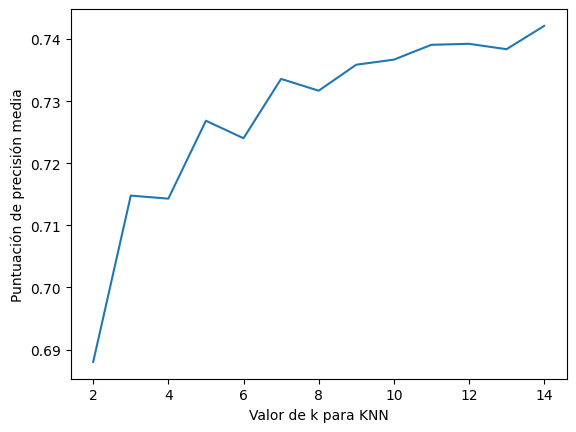

In [ ]:
#graficamos los resultados
k_range = range(2, 15)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train.ravel(), cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Valor de k para KNN')
plt.ylabel('Puntuación de precisión media')
plt.show()

In [ ]:
# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=14, metric="minkowski")

# Entrenar el modelo
knn.fit(X_train, y_train.ravel())

# Hacer predicciones en los datos de prueba
y_pred = knn.predict(X_test)

# Evaluar el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.7414167753150804


Hemos obtenido una precisión de 74'14%.

#### Matriz de confusión para KNN

<Axes: >

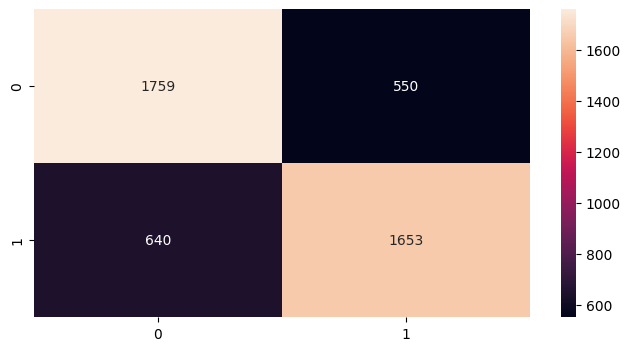

In [ ]:
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(C, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.76      0.75      2309
           2       0.75      0.72      0.74      2293

    accuracy                           0.74      4602
   macro avg       0.74      0.74      0.74      4602
weighted avg       0.74      0.74      0.74      4602



En este la precisión con la que el modelo predice los accidentes mortales es menor, de un 73%

### 3.1.4 Regresión Logística

Para la aplicación de este algoritmo fijaremos un número máximo de iteraciones de 10, pues en otro caso se tarda bastante en ejecutar. Veremos que regularización resulta más conveniente en nuestro caso: Lasso o Ridge, y cual de los solucionadores introducidos es más conveniente.

In [ ]:
#buscamos los mejores parámetros para el modelo
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[10],
}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

logreg_cv.fit(X_train,y_train.ravel())
pen=logreg_cv.best_params_['penalty']
c=logreg_cv.best_params_['C']
sv=logreg_cv.best_params_['solver']


print("Los mejores parámetros son) ",logreg_cv.best_params_)

Los mejores parámetros son)  {'C': 0.1, 'max_iter': 10, 'penalty': 'l1', 'solver': 'saga'}


Observamos además que no tenemos un tamaño de pesos elevado.

In [ ]:
rlog = LogisticRegression(C=c,penalty=pen, solver=sv,max_iter=10)
# Creamos un modelo con los datos de entrenamiento
LOG=rlog.fit(X_train,y_train)
y_pred=LOG.predict(X_test)

In [ ]:
print("Accuracy regresión:",rlog.score(X_test, y_test))

Accuracy regresión: 0.7381573229030857


Hemos obtenido una precisión del 73'62%.

#### Matriz de confusión para Regresión Logística

<Axes: >

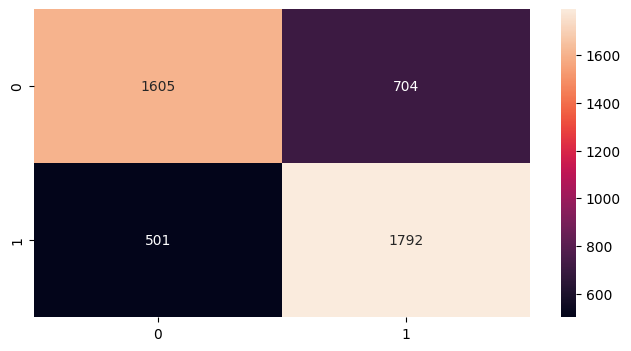

In [ ]:
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(C, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.70      0.73      2309
           2       0.72      0.78      0.75      2293

    accuracy                           0.74      4602
   macro avg       0.74      0.74      0.74      4602
weighted avg       0.74      0.74      0.74      4602



Por último tenemos que para accidentes mortales el modelo predice correctamente el 76% de ellos

### 3.1.5 Comparación entre modelos

In [ ]:
compare = pd.DataFrame({'Modelo': ['Decision Tree','Random Forest','KNN', 'Logistic Regression'], 
                        'Accuracy': [73.68, 76.11, 74.14, 73.62]})
compare.sort_values(by='Accuracy', ascending=False)

,Modelo,Accuracy
1,Random Forest,76.11
2,KNN,74.14
0,Decision Tree,73.68
3,Logistic Regression,73.62


Comparando los modelos para la variable C_SEV observamos que el que mejor clasificación ofrece es el de random forest con un accuracy de 76,11%

## 3.2. Variable P_ISEV

Vamos a aplicar los mismos algoritmos para la variable P_ISEV, a excepción del método KNN pues es bastante lento debido al volumen de datos.

In [ ]:
df['P_ISEV'] = np.where(df['P_ISEV'] == 1, 0, df["P_ISEV"])
df['P_ISEV'] = np.where((df['P_ISEV'] == 2)|(df['P_ISEV'] == 3), 1, df["P_ISEV"])

<Axes: >

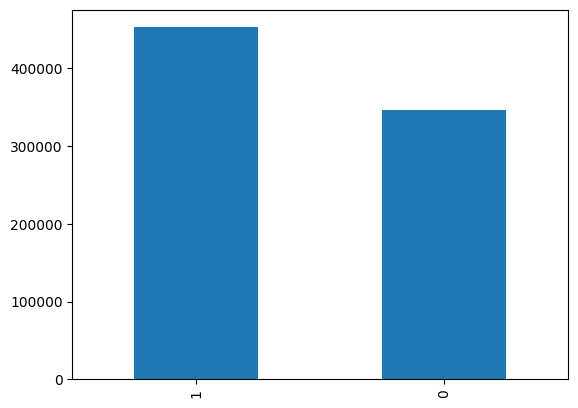

In [ ]:
df["P_ISEV"].value_counts().plot.bar()

**Las etiquetas son:**
- 0: No heridos.
- 1: Heridos.

No consideramos que sea necesario aplicar técnicas de balanceo para esta variable.

### Filtrado de variables para P_ISEV

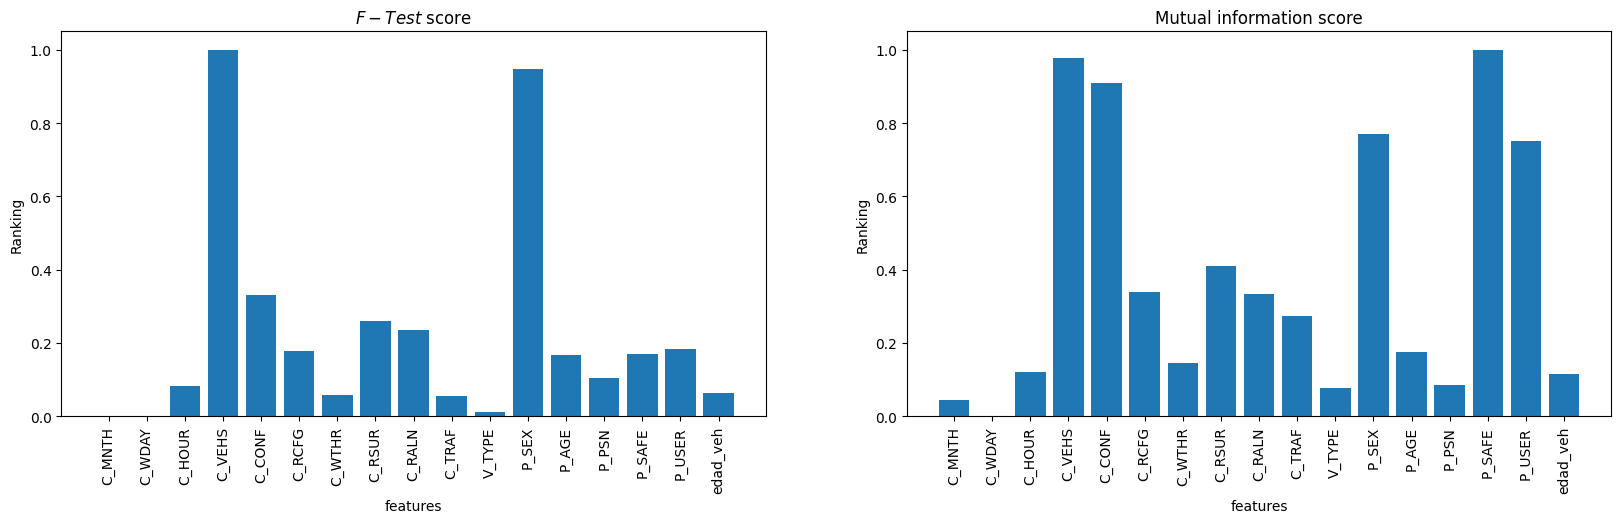

In [ ]:
#buscamos cuales son las variables más relacionadas con p_isev
X=df.drop(["C_SEV", "P_ISEV"], axis=1)
y=df["P_ISEV"]

feature_names = X.columns[:]

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Fijándonos en ambas gráficas, decidimos eliminar las siguientes variables:

In [ ]:
df=df.drop(["C_MNTH", "C_WDAY", "C_HOUR", "C_WTHR", "V_TYPE", "P_AGE","P_PSN", "edad_veh"], axis=1)

Luego, las variables que más influyen para predecir la gravedad de la persona afectada son: el número de vehículos implicados en la colisión y el género de la persona afectada, junto a la configuración de la colisión y las medidas de seguridad tomadas.

Las variables que se utilizan son:

- C_VEHS: número de vehículos involucrados en el accidente. 
- C_CONF: configuración de la colisión. 
- C_RCFG: configuración de la carretera.  
- C_RSUR: estado de la superficie de la carretera. 
- C_RALN: alineación vial. 
- C_TRAF: control de tráfico.
- P_SEX: género de la persona afectada. 
- P_SAFE: dispositivo de seguridad utilizado. 
- P_USER: tipo de usuario.


In [ ]:
X = df.drop(['C_SEV','P_ISEV'], axis=1)
y = df["P_ISEV"]

#dividimos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((639451, 9), (159863, 9), (639451,), (159863,))

In [ ]:
#aplicamos one hot encoding para aplicar los modelos de manera efectiva
enc = ce.OneHotEncoder(cols=X_train.columns)
model=enc.fit(X_train, y_train)
X_train=model.fit_transform(X_train, y_train)
X_test=model.transform(X_test, y_test)

### 3.2.1 Árbol de decisión

best mean cross-validation score: 0.652
best parameters: {'max_depth': 14}


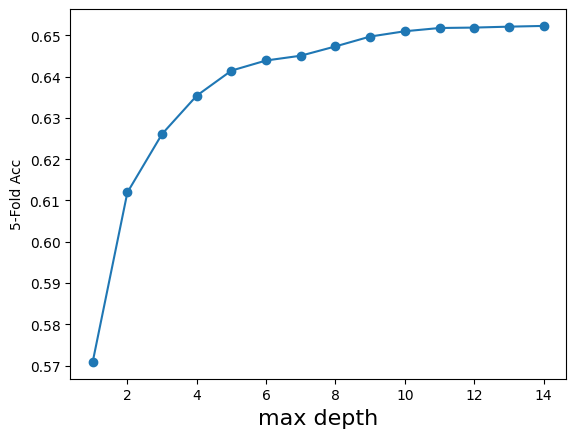

In [ ]:
#buscamos la profundidad optima para el modelo
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

Elegimos profundidad 11 pues no observamos una gran mejora.

In [ ]:
arbol = DecisionTreeClassifier(random_state=0,max_depth=11)

# Entrenar el modelo
arbol.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = arbol.predict(X_test)

# Evaluar el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.6514828321750499


Obtenemos un accuracy del 65.14%

#### Matriz de confusión para Árbol de Decisión

<Axes: >

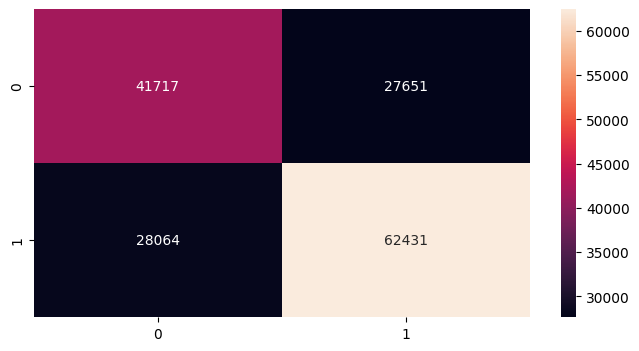

In [ ]:
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(C, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60     69368
           1       0.69      0.69      0.69     90495

    accuracy                           0.65    159863
   macro avg       0.65      0.65      0.65    159863
weighted avg       0.65      0.65      0.65    159863



En este modelo, el algoritmo predice correctamente el 69% de accidentes con heridos.

### 3.2.2  Random Forest

best mean cross-validation score: 0.655
best parameters: {'max_depth': 17}


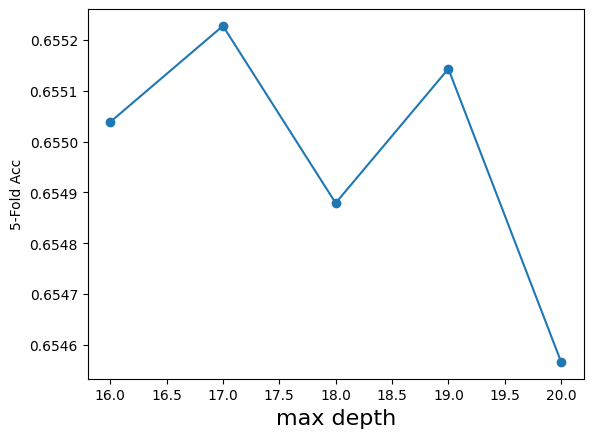

In [ ]:
#buscamos cuanto de profundo debe ser el forest
maxDepth = range(16,21)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(n_estimators = 20), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train.ravel())
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [ ]:
# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=30, random_state=0, max_depth=18)

# Entrenar el modelo
rf.fit(X_train, y_train.ravel())

# Hacer predicciones en los datos de prueba
y_pred = rf.predict(X_test)

# Evaluar el rendimiento del modelo
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.6551609815904869


Obtenemos un accuracy del 65.51%

#### Matriz de confusión para Random Forest

<Axes: >

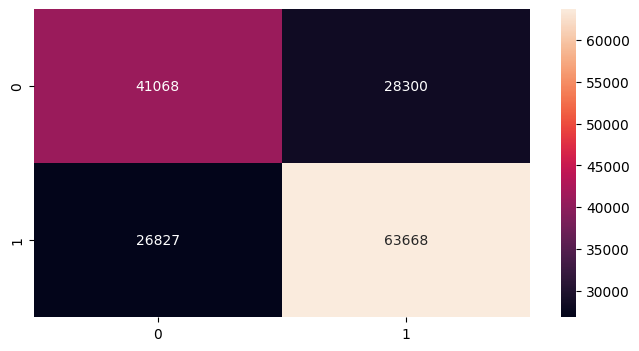

In [ ]:

C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(C, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60     69368
           1       0.69      0.70      0.70     90495

    accuracy                           0.66    159863
   macro avg       0.65      0.65      0.65    159863
weighted avg       0.65      0.66      0.65    159863



En el caso de random forest el porcentaje de predicción de accidentes con heridos algo mayor que para el algoritmo de árbol de clasificación

### 3.2.3 Regresión logística

Debido al amplio volumen de datos, elegiremos manualmente como hacer la regresión logística.

In [ ]:
rlog = LogisticRegression(C=0.1,penalty='l1', solver='liblinear',max_iter=10)
# Creamos un modelo con los datos de entrenamiento
LOG=rlog.fit(X_train,y_train)
y_pred=LOG.predict(X_test)

In [ ]:
print("Accuracy regresión:",rlog.score(X_test, y_test))

Accuracy regresión: 0.6421873729380783


Obtenemos un accuracy del 64.21%

#### Matriz de confusión para Regresión Logística

<Axes: >

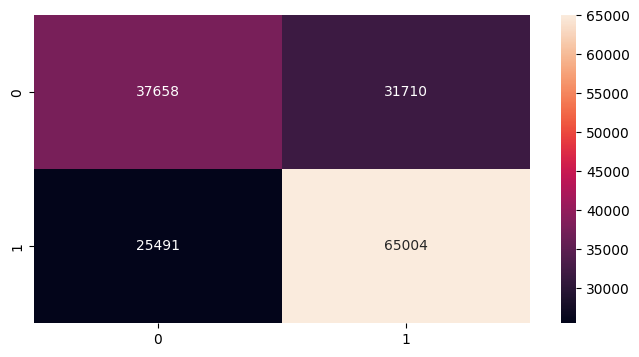

In [ ]:
#se calcula la matriz de confusion
C = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(C, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57     69368
           1       0.67      0.72      0.69     90495

    accuracy                           0.64    159863
   macro avg       0.63      0.63      0.63    159863
weighted avg       0.64      0.64      0.64    159863



Por último, en el caso de regresión lógistica baja ligeramente la precisión. Acertando el modelo el 67% de los accidentes con heridos.

### 3.2.4 Comparación entre nuestros modelos

In [ ]:
#comparamos los modelos en función del accuracy
compare = pd.DataFrame({'Modelo': ['Decision Tree','Random Forest', 'Logistic Regression'], 
                        'Accuracy': [65.14, 65.51, 64.21]})
compare.sort_values(by='Accuracy', ascending=False)

,Modelo,Accuracy
1,Random Forest,65.51
0,Decision Tree,65.14
2,Logistic Regression,64.21


Sin duda vemos que el mejor modelo de clasificación para la variable P_ISEV es random forest, con un accuracy de mas de 65%.

# 4. Otros análisis

In [ ]:
#se extraen los datos y se dividen
y=df5[['P_SEX','C_SEV','P_AGE']].value_counts(sort=False).reset_index()

mujer1=[]
hombre1=[]
mujer2=[]
hombre2=[]
for i in range(0,20):
  if i<5:
    mujer1.append(y.iat[i,3])
  elif i>=5 and i<10:
    mujer2.append(y.iat[i,3])
  elif i>=10 and i<15:
    hombre1.append(y.iat[i,3])
  else:
    hombre2.append(y.iat[i,3])


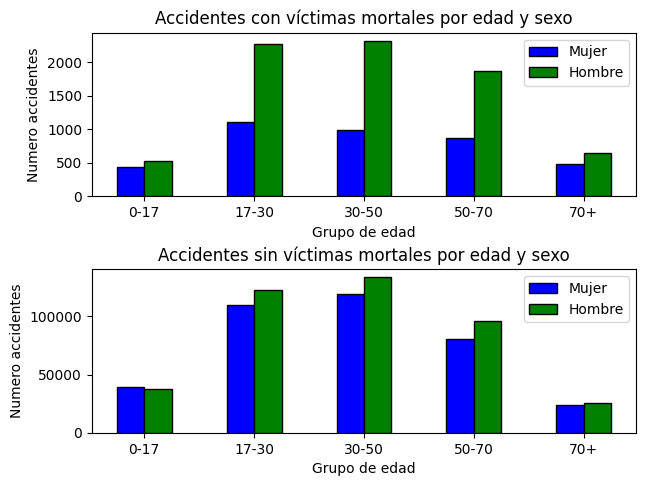

In [ ]:
#se generan las dos gráficas
fig, (ax1, ax2) = plt.subplots(2, 1)

n=5
r = np.arange(n)
width=0.25

ax1.bar(r, mujer1, color = 'b',
        width = width, edgecolor = 'black',
        label='Mujer')
ax1.bar(r + width, hombre1, color = 'g',
        width = width, edgecolor = 'black',
        label='Hombre')
  
ax1.set_xlabel("Grupo de edad")
ax1.set_title("Accidentes con víctimas mortales por edad y sexo")
ax1.set_ylabel("Numero accidentes")

ax1.set_xticks(r + width/2,['0-17','17-30','30-50','50-70','70+'])
ax1.legend()

ax2.bar(r, mujer2, color = 'b',
        width = width, edgecolor = 'black',
        label='Mujer')
ax2.bar(r + width, hombre2, color = 'g',
        width = width, edgecolor = 'black',
        label='Hombre')
  
ax2.set_xlabel("Grupo de edad")
ax2.set_title("Accidentes sin víctimas mortales por edad y sexo")
ax2.set_ylabel("Numero accidentes")

ax2.set_xticks(r + width/2,['0-17','17-30','30-50','50-70','70+'])
ax2.legend()
plt.tight_layout(pad=0.5) 
plt.show()

Se puede observar que en todos los grupos de edad el número de accidentes por sexo siempre es mayor en el caso de los hombres. Hay picos en los grupos de edad de jovenes y adultos, porque conducen más y, en el caso de los más jovenes, son más temerarios.

In [ ]:
#se agrupan los meses por estaciones, hemos tenido en cuenta las estaciones 
#meteorológicas que abarcan los meses completos
df5['C_MNTH']=np.where(df5['C_MNTH']<3, 13, df5['C_MNTH']) #invierno
df5['C_MNTH']=np.where(df5['C_MNTH']<6, 14, df5['C_MNTH']) #primavera
df5['C_MNTH']=np.where(df5['C_MNTH']<9, 15, df5['C_MNTH']) #verano
df5['C_MNTH']=np.where(df5['C_MNTH']<12, 16, df5['C_MNTH']) #otoño
df5['C_MNTH']=np.where(df5['C_MNTH']==12,13,df5['C_MNTH'])

In [ ]:
#se extraen los datos pertinentes del dataset
y=df5[['C_MNTH','C_SEV','C_YEAR']].value_counts(sort=False).reset_index()

seasons1=[]
seasons2=[]
for i in range(0,32):
  if y.iat[i,1]==1:
    seasons1.append(y.iat[i,3])
  else:
    seasons2.append(y.iat[i,3])
  
seasons11=[seasons1[idx:idx+4] for idx in range(0, len(seasons1), 4)]
seasons22=[seasons2[idx:idx+4] for idx in range(0, len(seasons2), 4)]

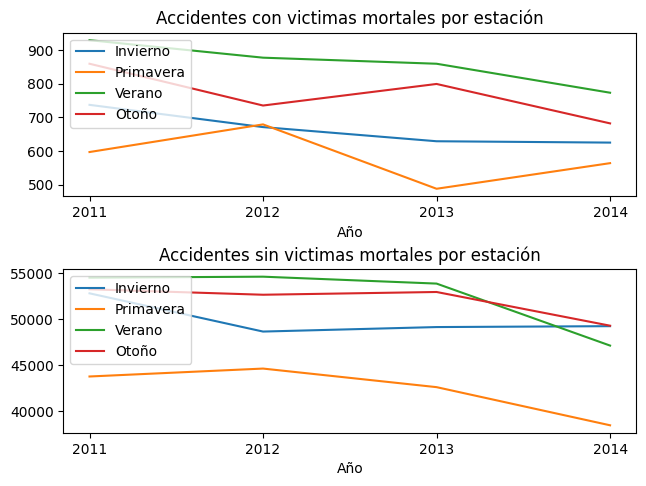

In [ ]:
#se elaboran dos gráficas a partir de los datos obtenidos
fig, (ax1, ax2) = plt.subplots(2, 1)
x=['2011','2012','2013','2014']

ax1.plot(x,seasons11[0],label='Invierno')
ax1.plot(x,seasons11[1],label='Primavera')
ax1.plot(x,seasons11[2],label='Verano')
ax1.plot(x,seasons11[3],label='Otoño')
ax1.set_title('Accidentes con victimas mortales por estación')
ax1.legend(loc='upper left')
ax1.set_xlabel('Año')

ax2.plot(x,seasons22[0],label='Invierno')
ax2.plot(x,seasons22[1],label='Primavera')
ax2.plot(x,seasons22[2],label='Verano')
ax2.plot(x,seasons22[3],label='Otoño')
ax2.set_title('Accidentes sin victimas mortales por estación')
ax2.legend(loc='upper left')
ax2.set_xlabel('Año')

plt.tight_layout(pad=0.5) 
plt.show()

Se puede ver que la estación donde más accidentes con víctimas mortales hay es en verano. Esto se puede deber a las vacaciones y a que la gente conduce más. Esto sorprende, ya que uno esperaría que fuera en invierno, sobre todo, teniendo en cuenta la climatología de Canada. Aunque también puede ser debido a que precisamente, el buen tiempo hace que los conductores se confíen y presten menos atención.

# Conclusión:
Se concluye que la mayoría de accidentes se dan en los meses de enero y diciembre, sobre todo los viernes en torno a las 16h. En la mayoría de accidentes no hay victimas mortales pero sí heridos. Cada año hay menos accidentes. La mayoría de ellos se dan por choques por alcance y en las intersecciones de dos vías públicas, mayormente en días soleados y con las carreteras secas. Por último, los mayores afectados son los conductores de vehículos ligeros.
Los vehículos con más accidentes son los ligeros de entre 5 y 9 años de antigüedad, siendo los que menos accidentes tienen los de más de 15 años de antigüedad. 
Los conductores más propensos a tener accidentes son los hombres en cuanto al sexo y los jóvenes de 18 años; en cuanto a los menos propensos a tener accidentes son las mujeres y los mayores de 70 años.
Las causas que provocan mayores fallecimientos en los accidentes son las características de la carretera, el control del tráfico y la alineación vial.
En la variable C_SEV se obtiene, tras la aplicación de los modelos, una accuracy en Random Forest del 76%, en Decision Tree del 74%, para Regresión Logística un 74% y para KNN un 74%, por lo que nos quedamos con el primer modelo. 
En las variables P_ISEV, al aplicar los modelos obtenemos para el modelo Random Forest, una accuracy del 65%, para Decision Tree 65% y para Regresión Logística un 64%, por lo que también nos quedaríamos con Random Forest. 
